In [90]:
import tensorflow_core.lite as tflite
import numpy as np
import PIL # Pillow Package to Handle Image
 
# Edit These Details Accordingly
MODEL_PATH = "facemask/model.tflite"
LABELS_PATH = "facemask/dict.txt"
IMAGE_PATH = "test_images/sample_3.jpg"

def load_labels(filename):
    with open(filename, 'r') as f:
        return [line.strip() for line in f.readlines()]

def load_image_as_tensor_data(image_file_name, width, height):
  img = PIL.Image.open(IMAGE_PATH).resize((width, height))
  return np.expand_dims(img, axis=0) # add N dim


In [91]:
labels = load_labels("facemask/dict.txt")
print(labels)

['not masked', 'masked']


In [92]:
interpreter = tflite.Interpreter(model_path=MODEL_PATH)
# A tensor is a generalization of vectors and matrices and is easily understood as a multidimensional array.
# For just think of tensors as "slots" or "containers" used by our AI Model to compute input and arrive to an output.
# Eg. to predict a label.
interpreter.allocate_tensors()

# Get input and output tensor definitions from our trained model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# NxHxWxC, H:1, W:2 -> Getting Width and Height from Input Tensors shape
# Shape describes how our tensors look like
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

print(f'Height: {height}, Width: {width}')
print(input_details[0])
print(output_details[0])

Height: 224, Width: 224
{'name': 'image', 'index': 0, 'shape': array([  1, 224, 224,   3]), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.007874015718698502, 128)}
{'name': 'scores', 'index': 172, 'shape': array([1, 2]), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.00390625, 0)}


In [93]:
image_tensor_data = load_image_as_tensor_data(IMAGE_PATH, width, height)
interpreter.set_tensor(input_details[0]['index'], image_tensor_data)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)

# print (image_tensor_data)

0.5058823529411764: masked
0.4980392156862745: not masked


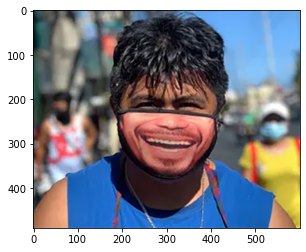

In [94]:
sorted_results = results.argsort()[-5:][::-1]
labels = load_labels(LABELS_PATH)

for i in sorted_results:
    print(f'{float(results[i] / 255.0)}: {labels[i]}') # Why 255? Lighted Value

# Showing image in matplotlib
# In your terminal:
# conda install -c conda-forge matplotlib
# Generally it's good to import all needed packages at the top of your notebook.
# But in here is done for the purpose of video tutorial context flow.
from matplotlib import image
from matplotlib import pyplot

# from IPython.display import Image
# Image(IMAGE_PATH)

# load image as pixel array
image = image.imread(IMAGE_PATH)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()
